<a href="https://colab.research.google.com/github/momoash04/Path_Planning-Shell-auc-/blob/main/Sector_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

# Helper functions
def is_inside_track(point, track_bounds):
    # Simple polygon containment check using ray-casting algorithm
    x, y = point
    n = len(track_bounds)
    inside = False

    px, py = track_bounds[-1]
    for i in range(n):
        cx, cy = track_bounds[i]
        if ((cy > y) != (py > y)) and (x < (px - cx) * (y - cy) / (py - cy) + cx):
            inside = not inside
        px, py = cx, cy

    return inside

def heuristic(p1, p2):
    # Euclidean distance as a heuristic
    return np.hypot(p2[0] - p1[0], p2[1] - p1[1])

# Find farthest goal point
def find_farthest_goal(car_location, track_bounds):
    max_distance = -1
    best_goal = car_location

    min_x = int(min(x for x, _ in track_bounds))
    max_x = int(max(x for x, _ in track_bounds))
    min_y = int(min(y for _, y in track_bounds))
    max_y = int(max(y for _, y in track_bounds))

    for x in range(min_x, max_x + 1):
        for y in range(min_y, max_y + 1):
            candidate = (x, y)
            if is_inside_track(candidate, track_bounds):
                distance = heuristic(car_location, candidate)
                if distance > max_distance:
                    max_distance = distance
                    best_goal = candidate

    return best_goal

# APF Algorithm
def apf_path_planning(car_location, goal, obstacles, step_size=1.0, repulsive_scale=100.0, attractive_scale=1.0):
    path = [car_location]
    current_position = np.array(car_location)

    while heuristic(current_position, goal) > step_size:
        # Attractive force towards the goal
        attractive_force = attractive_scale * (np.array(goal) - current_position)

        # Repulsive force from obstacles
        repulsive_force = np.zeros(2)
        for obs in obstacles:
            obs_vector = current_position - np.array(obs)
            distance_to_obs = np.linalg.norm(obs_vector)
            if distance_to_obs < 10:  # Influence radius of obstacles
                repulsive_force += repulsive_scale * obs_vector / (distance_to_obs**3 + 1e-6)

        # Total force and movement
        total_force = attractive_force + repulsive_force
        total_force /= np.linalg.norm(total_force)  # Normalize force vector

        new_position = current_position + step_size * total_force
        path.append(tuple(new_position))
        current_position = new_position

        # Stop if we get stuck or oscillate near the goal
        if len(path) > 2 and heuristic(path[-1], path[-3]) < 0.01:
            break

    return path

# Smooth the path using splines
def smooth_path(path, smoothing_factor=3):
    x, y = zip(*path)
    tck, u = splprep([x, y], s=smoothing_factor)
    u_new = np.linspace(0, 1, len(path) * 10)
    smooth_x, smooth_y = splev(u_new, tck)
    return list(zip(smooth_x, smooth_y))

# Calculate target velocity based on curvature
def calculate_target_velocity(path, max_speed=25):
    velocities = []
    for i in range(1, len(path)):
        prev_point = path[i - 1]
        current_point = path[i]

        # Calculate distance between points
        distance = np.hypot(current_point[0] - prev_point[0], current_point[1] - prev_point[1])

        # Adjust velocity to maintain smooth movement and respect the speed limit
        velocity = min(distance * 100, max_speed)
        velocities.append(velocity)

    return velocities

# Visualize the results
def visualize_path(track_bounds, car_location, goal, path, velocities):
    fig, ax = plt.subplots()

    # Draw track boundaries
    x_vals, y_vals = zip(*track_bounds)
    ax.plot(x_vals + (x_vals[0],), y_vals + (y_vals[0],), 'b-', label='Track Boundaries')

    # Draw car and goal
    ax.plot(car_location[0], car_location[1], 'go', label='Start (Car)')
    ax.plot(goal[0], goal[1], 'ro', label='Goal')

    # Draw smoothed path
    if path:
        px, py = zip(*path)
        ax.plot(px, py, 'y-', label='Smoothed Path')

    # Display velocities every 10m along the path
    distance = 0
    for i in range(1, len(path)):
        prev_point = path[i - 1]
        current_point = path[i]
        segment_length = np.hypot(current_point[0] - prev_point[0], current_point[1] - prev_point[1])
        distance += segment_length

        if distance >= 10:
            ax.text(current_point[0], current_point[1], f"{velocities[min(i-1,len(velocities)-1)]:.1f} m/s", fontsize=8,color='red')
            distance=0


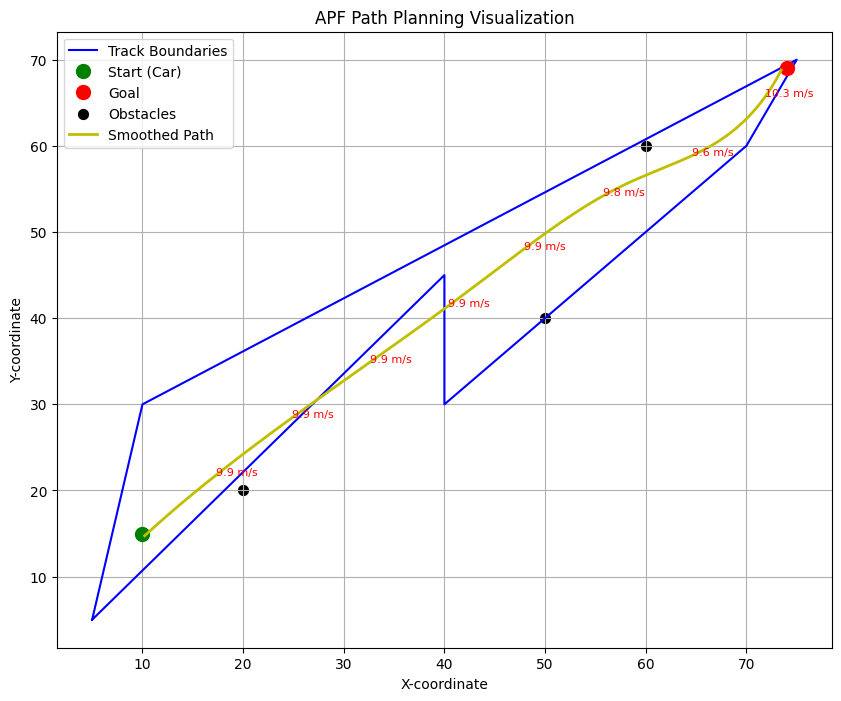

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

# Helper functions
def is_inside_track(point, track_bounds):
    # Simple polygon containment check using ray-casting algorithm
    x, y = point
    n = len(track_bounds)
    inside = False

    px, py = track_bounds[-1]
    for i in range(n):
        cx, cy = track_bounds[i]
        if ((cy > y) != (py > y)) and (x < (px - cx) * (y - cy) / (py - cy) + cx):
            inside = not inside
        px, py = cx, cy

    return inside

def heuristic(p1, p2):
    # Euclidean distance as a heuristic
    return np.hypot(p2[0] - p1[0], p2[1] - p1[1])

# Find farthest goal point
def find_farthest_goal(car_location, track_bounds):
    max_distance = -1
    best_goal = car_location

    min_x = int(min(x for x, _ in track_bounds))
    max_x = int(max(x for x, _ in track_bounds))
    min_y = int(min(y for _, y in track_bounds))
    max_y = int(max(y for _, y in track_bounds))

    for x in range(min_x, max_x + 1):
        for y in range(min_y, max_y + 1):
            candidate = (x, y)
            if is_inside_track(candidate, track_bounds):
                distance = heuristic(car_location, candidate)
                if distance > max_distance:
                    max_distance = distance
                    best_goal = candidate

    return best_goal

# APF Algorithm
def apf_path_planning(car_location, goal, obstacles, step_size=1.0, repulsive_scale=100.0, attractive_scale=1.0):
    path = [car_location]
    current_position = np.array(car_location)

    while heuristic(current_position, goal) > step_size:
        # Attractive force towards the goal
        attractive_force = attractive_scale * (np.array(goal) - current_position)

        # Repulsive force from obstacles
        repulsive_force = np.zeros(2)
        for obs in obstacles:
            obs_vector = current_position - np.array(obs)
            distance_to_obs = np.linalg.norm(obs_vector)
            if distance_to_obs < 10:  # Influence radius of obstacles
                repulsive_force += repulsive_scale * obs_vector / (distance_to_obs**3 + 1e-6)

        # Total force and movement
        total_force = attractive_force + repulsive_force
        total_force /= np.linalg.norm(total_force)  # Normalize force vector

        new_position = current_position + step_size * total_force
        path.append(tuple(new_position))
        current_position = new_position

        # Stop if we get stuck or oscillate near the goal
        if len(path) > 2 and heuristic(path[-1], path[-3]) < 0.01:
            break

    return path

# Smooth the path using splines
def smooth_path(path, smoothing_factor=3):
    x, y = zip(*path)
    tck, u = splprep([x, y], s=smoothing_factor)
    u_new = np.linspace(0, 1, len(path) * 10)
    smooth_x, smooth_y = splev(u_new, tck)
    return list(zip(smooth_x, smooth_y))

# Calculate target velocity based on curvature
def calculate_target_velocity(path, max_speed=25):
    velocities = []
    for i in range(1, len(path)):
        prev_point = path[i - 1]
        current_point = path[i]

        # Calculate distance between points
        distance = np.hypot(current_point[0] - prev_point[0], current_point[1] - prev_point[1])

        # Adjust velocity to maintain smooth movement and respect the speed limit
        velocity = min(distance * 100, max_speed)
        velocities.append(velocity)

    return velocities

# Visualize the results
def visualize_path(track_bounds, car_location, goal, path, velocities, obstacles=None):
    fig, ax = plt.subplots(figsize=(10, 8))

    # Draw track boundaries
    x_vals, y_vals = zip(*track_bounds)
    ax.plot(x_vals + (x_vals[0],), y_vals + (y_vals[0],), 'b-', label='Track Boundaries')

    # Draw car and goal
    ax.plot(car_location[0], car_location[1], 'go', label='Start (Car)', markersize=10)
    ax.plot(goal[0], goal[1], 'ro', label='Goal', markersize=10)

    # Draw obstacles if provided
    if obstacles:
        ox, oy = zip(*obstacles)
        ax.scatter(ox, oy, c='black', label='Obstacles', s=50)

    # Draw smoothed path
    if path:
        px, py = zip(*path)
        ax.plot(px, py, 'y-', label='Smoothed Path', linewidth=2)

    # Display velocities every 10m along the path
    distance = 0
    for i in range(1, len(path)):
        prev_point = path[i - 1]
        current_point = path[i]
        segment_length = np.hypot(current_point[0] - prev_point[0], current_point[1] - prev_point[1])
        distance += segment_length

        if distance >= 10:
            ax.text(current_point[0], current_point[1], f"{velocities[min(i-1,len(velocities)-1)]:.1f} m/s", fontsize=8,color='red')
            distance = 0

    # Add grid and legend
    ax.grid(True)
    ax.legend()
    ax.set_title("APF Path Planning Visualization")
    ax.set_xlabel("X-coordinate")
    ax.set_ylabel("Y-coordinate")

    plt.show()

# Input Data
track_bounds = [(5, 5), (10, 30), (75, 70), (70, 60), (40, 30), (40, 45)]
car_location = (10, 15)
obstacles = [(20, 20), (50, 40), (60, 60)]

# Find the optimized goal
goal = find_farthest_goal(car_location, track_bounds)

# Run APF path planning
path = apf_path_planning(car_location, goal, obstacles)

# Smooth the path
smoothed_path = smooth_path(path)

# Calculate target velocities
velocities = calculate_target_velocity(smoothed_path)

# Visualize results
visualize_path(track_bounds, car_location, goal, smoothed_path, velocities, obstacles)


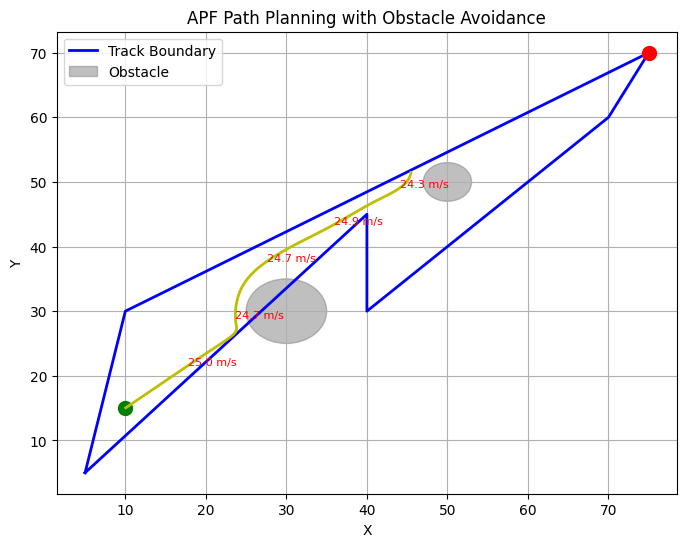

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path as MplPath
from scipy.interpolate import splprep, splev

# ----- Helper functions -----

def is_inside_track(point, track_bounds):
    """Check if a point is inside the polygon defined by track_bounds."""
    poly_path = MplPath(track_bounds)
    return poly_path.contains_point(point)

def heuristic(p1, p2):
    """Euclidean distance between two points."""
    return np.hypot(p1[0] - p2[0], p1[1] - p2[1])

def find_farthest_goal(car_location, track_bounds):
    """Generate a goal point as the farthest reachable point within track bounds."""
    max_distance = -1
    best_goal = car_location

    xs, ys = zip(*track_bounds)
    min_x, max_x = int(min(xs)), int(max(xs))
    min_y, max_y = int(min(ys)), int(max(ys))

    for x in range(min_x, max_x + 1):
        for y in range(min_y, max_y + 1):
            candidate = (x, y)
            if is_inside_track(candidate, track_bounds):
                distance = heuristic(car_location, candidate)
                if distance > max_distance:
                    max_distance = distance
                    best_goal = candidate
    return best_goal

def smooth_path(path, smoothing_factor=3):
    """Apply spline smoothing to the path."""
    x, y = zip(*path)
    tck, u = splprep([x, y], s=smoothing_factor)
    u_new = np.linspace(0, 1, len(path) * 10)
    smooth_x, smooth_y = splev(u_new, tck)
    return list(zip(smooth_x, smooth_y))

def calculate_target_velocity(path, max_speed=25, min_speed=5, curvature_threshold=0.3):
    """
    Calculate target velocity based on curvature.
    Lower speeds are assigned where curvature is high.
    """
    velocities = []
    n = len(path)
    # For endpoints, assign max_speed
    velocities.append(max_speed)
    for i in range(1, n-1):
        # Calculate vectors from previous->current and current->next
        p_prev = np.array(path[i-1])
        p_curr = np.array(path[i])
        p_next = np.array(path[i+1])

        v1 = p_curr - p_prev
        v2 = p_next - p_curr

        # Normalize vectors; if a vector is nearly zero, skip curvature calc
        norm1 = np.linalg.norm(v1)
        norm2 = np.linalg.norm(v2)
        if norm1 < 1e-3 or norm2 < 1e-3:
            curvature = 0
        else:
            # Angle between v1 and v2
            dot = np.clip(np.dot(v1, v2) / (norm1 * norm2), -1.0, 1.0)
            angle = np.arccos(dot)
            curvature = angle

        # Linearly scale the speed: high curvature -> low speed
        factor = np.clip(curvature / curvature_threshold, 0, 1)
        speed = max_speed - (max_speed - min_speed) * factor
        velocities.append(speed)
    velocities.append(max_speed)
    return velocities

# ----- APF algorithm implementation -----

def apf_path(car_location, goal, obstacles, track_bounds,
             k_att=1.0, k_rep=100.0, d0=10.0, step_size=0.5,
             tol=1.0, max_iters=1000):
    """
    Generate a path from car_location to goal using Artificial Potential Field (APF).

    Parameters:
      - k_att: attractive force gain
      - k_rep: repulsive force gain for obstacles
      - d0: influence distance for obstacles
      - step_size: how far to move per iteration
      - tol: distance tolerance to goal
      - max_iters: maximum number of iterations to avoid infinite loops

    Returns a list of (x,y) points representing the path.
    """
    current = np.array(car_location, dtype=float)
    goal = np.array(goal, dtype=float)
    path = [tuple(current)]
    iters = 0

    while np.linalg.norm(current - goal) > tol and iters < max_iters:
        # Attractive force: pulls toward goal
        f_att = -k_att * (current - goal)

        # Repulsive force: pushes away from obstacles
        f_rep = np.zeros(2)
        for (obs_center, obs_radius) in obstacles:
            obs_center = np.array(obs_center, dtype=float)
            vec = current - obs_center
            dist = np.linalg.norm(vec) - obs_radius  # distance from obstacle surface
            if dist < 1e-3:
                dist = 1e-3
            if dist < d0:
                # Repulsive force magnitude; note: divided by squared distance for stronger effect when close
                repulsive = k_rep * (1.0/dist - 1.0/d0) / (dist**2)
                f_rep += repulsive * (vec / np.linalg.norm(vec))
        # Sum the forces
        f_total = f_att + f_rep

        # Normalize the force vector to get direction
        norm_f = np.linalg.norm(f_total)
        if norm_f < 1e-3:
            # In case forces cancel, break to avoid being stuck.
            break
        direction = f_total / norm_f

        # Update current position with step size in the direction of net force
        next_point = current + step_size * direction

        # Ensure that the new point is within track bounds; if not, project it inside.
        if not is_inside_track(next_point, track_bounds):
            # If outside, try a smaller step in the same direction
            next_point = current + (step_size/2) * direction
            if not is_inside_track(next_point, track_bounds):
                # If still outside, break the loop
                break

        current = next_point
        path.append(tuple(current))
        iters += 1

    return path

# ----- Visualization -----

def visualize_path(track_bounds, obstacles, car_location, goal, path, velocities):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Draw track boundaries
    tb = np.array(track_bounds)
    ax.plot(np.append(tb[:,0], tb[0,0]), np.append(tb[:,1], tb[0,1]), 'b-', lw=2, label='Track Boundary')

    # Draw obstacles as circles
    for (center, radius) in obstacles:
        circle = plt.Circle(center, radius, color='gray', alpha=0.5, label='Obstacle')
        ax.add_patch(circle)
    # Ensure obstacles don't create duplicate labels in the legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    # Draw start and goal
    ax.plot(car_location[0], car_location[1], 'go', markersize=10, label='Start')
    ax.plot(goal[0], goal[1], 'ro', markersize=10, label='Goal')

    # Draw smoothed path
    if path:
        px, py = zip(*path)
        ax.plot(px, py, 'y-', lw=2, label='Smoothed Path')

    # Annotate target velocities every ~10 units along the path
    distance_acc = 0
    for i in range(1, len(path)):
        p_prev = np.array(path[i-1])
        p_curr = np.array(path[i])
        segment_length = np.linalg.norm(p_curr - p_prev)
        distance_acc += segment_length
        if distance_acc >= 10:
            vel = velocities[min(i, len(velocities)-1)]
            ax.text(p_curr[0], p_curr[1], f"{vel:.1f} m/s", fontsize=8, color='red')
            distance_acc = 0

    ax.legend(by_label.values(), by_label.keys())
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title("APF Path Planning with Obstacle Avoidance")
    ax.grid(True)
    plt.show()

# ----- Main simulation parameters -----

# Define the track as provided (polygon vertices)
track_bounds = [(5, 5), (10, 30), (75, 70), (70, 60), (40, 30), (40, 45)]

# Starting position of the car
car_location = (10, 15)

# Define obstacles as a list of tuples: (center, radius)
obstacles = [
    ((30, 30), 5),
    ((50, 50), 3)
]

# Determine a goal point (using the provided strategy)
goal = find_farthest_goal(car_location, track_bounds)

# Generate the raw path using the APF algorithm
raw_path = apf_path(car_location, goal, obstacles, track_bounds,
                    k_att=0.8, k_rep=150.0, d0=10.0, step_size=0.8, tol=1.0)

# Smooth the path using spline interpolation for a smooth curve
smoothed_path = smooth_path(raw_path, smoothing_factor=3)

# Calculate target velocities based on curvature along the smoothed path
velocities = calculate_target_velocity(smoothed_path, max_speed=25, min_speed=5, curvature_threshold=0.3)

# Visualize the results
visualize_path(track_bounds, obstacles, car_location, goal, smoothed_path, velocities)


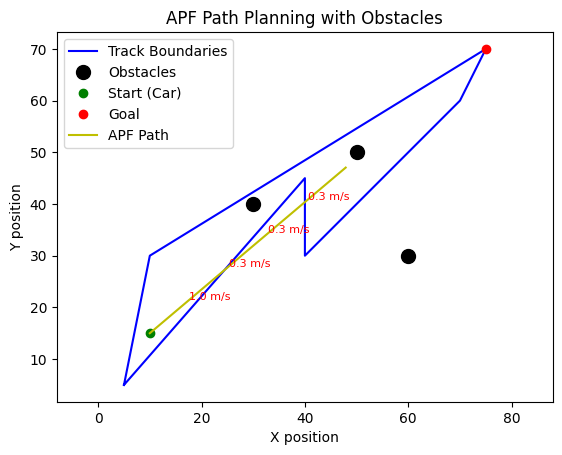

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

# --- Helper Functions from Provided Code ---
def is_inside_track(point, track_bounds):
    # Simplified is_inside_track for example, needs proper polygon check for real track
    return True  # Placeholder, replace with actual track boundary check if needed

def heuristic(start, goal):
    return np.sqrt((start[0] - goal[0])**2 + (start[1] - goal[1])**2)

# --- APF Implementation ---
def attractive_force(current_pos, goal_pos, attractive_gain=0.1):
    """
    Calculates the attractive force towards the goal.
    """
    direction = np.array(goal_pos) - np.array(current_pos)
    norm = np.linalg.norm(direction)
    if norm != 0:
        return attractive_gain * direction / norm
    else:
        return np.array([0, 0])

def repulsive_force(current_pos, obstacle_positions, repulsive_gain=10, min_obstacle_dist=5):
    """
    Calculates the repulsive force from obstacles.
    """
    net_repulsive_force = np.array([0.0, 0.0])
    for obstacle in obstacle_positions:
        direction = np.array(current_pos) - np.array(obstacle)
        dist = np.linalg.norm(direction)

        if 0 < dist < min_obstacle_dist:
            rep_force_magnitude = repulsive_gain * (1/dist - 1/min_obstacle_dist) / dist**2
            net_repulsive_force += rep_force_magnitude * direction / dist
    return net_repulsive_force

def net_force(current_pos, goal_pos, obstacle_positions):
    """
    Combines attractive and repulsive forces to get the net force.
    """
    attractive = attractive_force(current_pos, goal_pos)
    repulsive = repulsive_force(current_pos, obstacle_positions)
    return attractive + repulsive

def apf_path_planning(start_pos, goal_pos, obstacle_positions, step_size=1, max_iterations=500):
    """
    Implements APF path planning to find a path from start to goal avoiding obstacles.
    """
    path = [start_pos]
    current_pos = np.array(start_pos)

    for _ in range(max_iterations):
        force = net_force(current_pos, goal_pos, obstacle_positions)
        current_pos = current_pos + step_size * force

        path.append(tuple(current_pos))
        if np.linalg.norm(np.array(current_pos) - np.array(goal_pos)) < step_size:
            break # Reached goal

    return path

def find_farthest_goal_apf(car_location, track_bounds, obstacle_positions):
    """
    Finds the farthest goal considering obstacles (basic obstacle avoidance in goal selection).
    """
    max_distance = -1
    best_goal = car_location

    min_x_track = min(x for x, _ in track_bounds)
    max_x_track = max(x for x, _ in track_bounds)
    min_y_track = min(y for _, y in track_bounds)
    max_y_track = max(y for _, y in track_bounds)

    for x in range(min_x_track, max_x_track + 1, 5): # Reduced density for faster goal finding
        for y in range(min_y_track, max_y_track + 1, 5): # Reduced density for faster goal finding
            candidate = (x, y)
            if is_inside_track(candidate, track_bounds):
                is_near_obstacle = False
                for obstacle in obstacle_positions:
                    if heuristic(candidate, obstacle) < 10: # Basic obstacle proximity check
                        is_near_obstacle = True
                        break
                if not is_near_obstacle: # Consider goals not too close to obstacles
                    distance = heuristic(car_location, candidate)
                    if distance > max_distance:
                        max_distance = distance
                        best_goal = candidate
    return best_goal

def calculate_target_velocity_apf(path, obstacle_positions, max_speed=25, curve_speed_factor=0.5, obstacle_speed_factor=0.3):
    """
    Calculates target velocity considering path curvature and proximity to obstacles.
    """
    velocities = []
    for i in range(1, len(path)):
        prev_point = np.array(path[i - 1])
        current_point = np.array(path[i])

        distance = np.linalg.norm(current_point - prev_point)
        velocity = min(distance * 100, max_speed) # Base velocity on segment length

        # Curvature adjustment (simple angle change)
        if i > 1:
            prev_direction = prev_point - np.array(path[i-2])
            current_direction = current_point - prev_point
            cos_angle = np.dot(prev_direction, current_direction) / (np.linalg.norm(prev_direction) * np.linalg.norm(current_direction) + 1e-6) # avoid division by zero
            curve_factor = max(0, cos_angle) # 1 for straight, 0 for sharp turn
            velocity *= curve_speed_factor + (1 - curve_speed_factor) * curve_factor # Reduce speed in curves

        # Obstacle proximity adjustment
        for obstacle in obstacle_positions:
            if np.linalg.norm(current_point - np.array(obstacle)) < 15: # Obstacle proximity range
                velocity *= obstacle_speed_factor # Reduce speed near obstacles
                break # Only reduce once per segment even if multiple obstacles are near

        velocities.append(velocity)
    return velocities

def visualize_path_apf(track_bounds, car_location, goal, path, velocities, obstacle_positions):
    """
    Visualizes the path, velocities, obstacles, car, and goal.
    """
    fig, ax = plt.subplots()

    # Draw track boundaries
    x_vals, y_vals = zip(*track_bounds)
    ax.plot(x_vals + (x_vals[0],), y_vals + (y_vals[0],), 'b-', label='Track Boundaries')

    # Draw obstacles
    for obstacle in obstacle_positions:
        ax.plot(obstacle[0], obstacle[1], 'ko', markersize=10, label='Obstacles' if obstacle == obstacle_positions[0] else "") # Label only once

    # Draw car and goal
    ax.plot(car_location[0], car_location[1], 'go', label='Start (Car)')
    ax.plot(goal[0], goal[1], 'ro', label='Goal')

    # Draw APF path
    if path:
        px, py = zip(*path)
        ax.plot(px, py, 'y-', label='APF Path')

    # Display velocities
    distance = 0
    if path and velocities: # Check if path and velocities are not empty
        for i in range(1, len(path)):
            prev_point = path[i - 1]
            current_point = path[i]
            segment_length = np.hypot(current_point[0] - prev_point[0], current_point[1] - prev_point[1])
            distance += segment_length

            if distance >= 10 and i < len(velocities): # Check index bounds for velocities
                ax.text(current_point[0], current_point[1], f"{velocities[min(i-1, len(velocities) - 1)]:.1f} m/s", fontsize=8, color='red') # Corrected index
                distance = 0

    ax.legend()
    ax.set_title('APF Path Planning with Obstacles')
    ax.set_xlabel('X position')
    ax.set_ylabel('Y position')
    ax.axis('equal') # Keep aspect ratio for better visualization
    plt.show()


# --- Input Data with Obstacles ---
track_bounds = [(5, 5), (10, 30), (75, 70), (70, 60), (40, 30), (40, 45), (5,5)] # Closed loop
car_location = (10, 15)
obstacle_positions = [(30, 40), (50, 50), (60, 30)] # Example obstacle positions

# --- Goal Finding, Path Planning, Velocity Calculation, Visualization ---
goal = find_farthest_goal_apf(car_location, track_bounds, obstacle_positions)
apf_path = apf_path_planning(car_location, goal, obstacle_positions)
smoothed_path_apf = smooth_path(apf_path) # Smoothing the APF path
velocities_apf = calculate_target_velocity_apf(smoothed_path_apf, obstacle_positions) # Velocity based on smoothed path

visualize_path_apf(track_bounds, car_location, goal, smoothed_path_apf, velocities_apf, obstacle_positions)

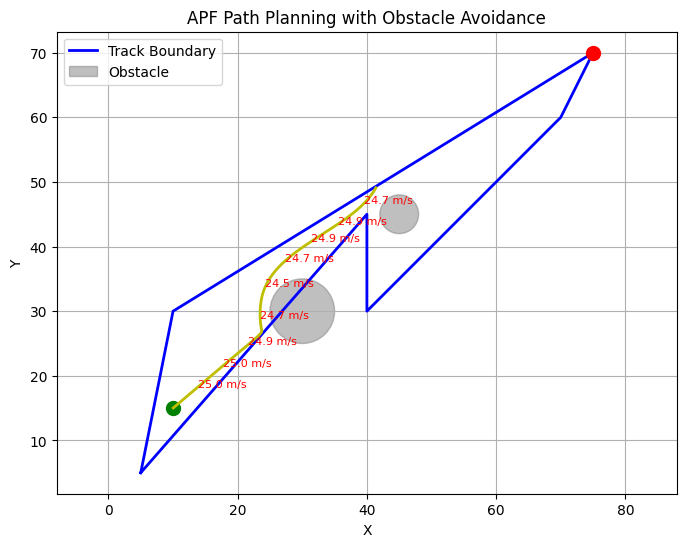

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path as MplPath
from scipy.interpolate import splprep, splev

# ----- Helper functions -----

def is_inside_track(point, track_bounds):
    """Check if a point is inside the polygon defined by track_bounds."""
    poly_path = MplPath(track_bounds)
    return poly_path.contains_point(point)

def heuristic(p1, p2):
    """Euclidean distance between two points."""
    return np.hypot(p1[0] - p2[0], p1[1] - p2[1])

def find_farthest_goal(car_location, track_bounds):
    """Generate a goal point as the farthest reachable point within track bounds."""
    max_distance = -1
    best_goal = car_location

    xs, ys = zip(*track_bounds)
    min_x, max_x = int(min(xs)), int(max(xs))
    min_y, max_y = int(min(ys)), int(max(ys))

    for x in range(min_x, max_x + 1):
        for y in range(min_y, max_y + 1):
            candidate = (x, y)
            if is_inside_track(candidate, track_bounds):
                distance = heuristic(car_location, candidate)
                if distance > max_distance:
                    max_distance = distance
                    best_goal = candidate
    return best_goal

def smooth_path(path, smoothing_factor=3):
    """Apply spline smoothing to the path."""
    x, y = zip(*path)
    tck, u = splprep([x, y], s=smoothing_factor)
    u_new = np.linspace(0, 1, len(path) * 10)
    smooth_x, smooth_y = splev(u_new, tck)
    return list(zip(smooth_x, smooth_y))

def calculate_target_velocity(path, max_speed=25, min_speed=5, curvature_threshold=0.3):
    """
    Calculate target velocity based on curvature.
    Lower speeds are assigned where curvature is high.
    """
    velocities = []
    n = len(path)
    # For endpoints, assign max_speed
    velocities.append(max_speed)
    for i in range(1, n-1):
        # Calculate vectors from previous->current and current->next
        p_prev = np.array(path[i-1])
        p_curr = np.array(path[i])
        p_next = np.array(path[i+1])

        v1 = p_curr - p_prev
        v2 = p_next - p_curr

        # Normalize vectors; if a vector is nearly zero, skip curvature calc
        norm1 = np.linalg.norm(v1)
        norm2 = np.linalg.norm(v2)
        if norm1 < 1e-3 or norm2 < 1e-3:
            curvature = 0
        else:
            # Angle between v1 and v2
            dot = np.clip(np.dot(v1, v2) / (norm1 * norm2), -1.0, 1.0)
            angle = np.arccos(dot)
            curvature = angle

        # Linearly scale the speed: high curvature -> low speed
        factor = np.clip(curvature / curvature_threshold, 0, 1)
        speed = max_speed - (max_speed - min_speed) * factor
        velocities.append(speed)
    velocities.append(max_speed)
    return velocities

# ----- APF algorithm implementation -----

def apf_path(car_location, goal, obstacles, track_bounds,
             k_att=0.8, k_rep=200.0, d0=15.0, step_size=0.5,
             tol=1.0, max_iters=1000): # Increased k_rep and d0 for stronger repulsion
    """
    Generate a path from car_location to goal using Artificial Potential Field (APF).

    Parameters:
      - k_att: attractive force gain
      - k_rep: repulsive force gain for obstacles
      - d0: influence distance for obstacles
      - step_size: how far to move per iteration
      - tol: distance tolerance to goal
      - max_iters: maximum number of iterations to avoid infinite loops

    Returns a list of (x,y) points representing the path.
    """
    current = np.array(car_location, dtype=float)
    goal = np.array(goal, dtype=float)
    path = [tuple(current)]
    iters = 0

    while np.linalg.norm(current - goal) > tol and iters < max_iters:
        # Attractive force: pulls toward goal
        f_att = -k_att * (current - goal)

        # Repulsive force: pushes away from obstacles
        f_rep = np.zeros(2)
        for (obs_center, obs_radius) in obstacles:
            obs_center = np.array(obs_center, dtype=float)
            vec = current - obs_center
            dist = np.linalg.norm(vec) - obs_radius  # distance from obstacle surface
            if dist < 1e-3:
                dist = 1e-3
            if dist < d0:
                # Repulsive force magnitude; note: divided by squared distance for stronger effect when close
                repulsive = k_rep * (1.0/dist - 1.0/d0) / (dist**2)
                f_rep += repulsive * (vec / np.linalg.norm(vec))
        # Sum the forces
        f_total = f_att + f_rep

        # Normalize the force vector to get direction
        norm_f = np.linalg.norm(f_total)
        if norm_f < 1e-3:
            # In case forces cancel, break to avoid being stuck.
            break
        direction = f_total / norm_f

        # Update current position with step size in the direction of net force
        next_point = current + step_size * direction

        # Ensure that the new point is within track bounds; if not, project it inside.
        if not is_inside_track(next_point, track_bounds):
            # If outside, try a smaller step in the same direction
            next_point = current + (step_size/2) * direction
            if not is_inside_track(next_point, track_bounds):
                # If still outside, break the loop
                break

        current = next_point
        path.append(tuple(current))
        iters += 1

    return path

# ----- Visualization -----

def visualize_path(track_bounds, obstacles, car_location, goal, path, velocities):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Draw track boundaries
    tb = np.array(track_bounds)
    ax.plot(np.append(tb[:,0], tb[0,0]), np.append(tb[:,1], tb[0,1]), 'b-', lw=2, label='Track Boundary')

    # Draw obstacles as circles
    for (center, radius) in obstacles:
        circle = plt.Circle(center, radius, color='gray', alpha=0.5, label='Obstacle')
        ax.add_patch(circle)
    # Ensure obstacles don't create duplicate labels in the legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    # Draw start and goal
    ax.plot(car_location[0], car_location[1], 'go', markersize=10, label='Start')
    ax.plot(goal[0], goal[1], 'ro', markersize=10, label='Goal')

    # Draw smoothed path
    if path:
        px, py = zip(*path)
        ax.plot(px, py, 'y-', lw=2, label='Smoothed Path')

    # Annotate target velocities more frequently along the path
    distance_acc = 0
    for i in range(1, len(path)):
        p_prev = np.array(path[i-1])
        p_curr = np.array(path[i])
        segment_length = np.linalg.norm(p_curr - p_prev)
        distance_acc += segment_length
        if distance_acc >= 5: # Reduced distance for more frequent velocity markers
            vel = velocities[min(i, len(velocities)-1)]
            ax.text(p_curr[0], p_curr[1], f"{vel:.1f} m/s", fontsize=8, color='red')
            distance_acc = 0

    # Annotate velocity at every point (optional, can be cluttered for long paths)
    # if path and velocities:
    #     for i, p in enumerate(path):
    #         if i < len(velocities): # Ensure velocity index is within bounds
    #             ax.text(p[0], p[1], f"{velocities[i]:.1f} m/s", fontsize=7, color='purple')


    ax.legend(by_label.values(), by_label.keys(), loc='upper left') # Adjusted legend location
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title("APF Path Planning with Obstacle Avoidance")
    ax.grid(True)
    ax.axis('equal') # Keep aspect ratio
    plt.show()

# ----- Main simulation parameters -----

# Define the track as provided (polygon vertices)
track_bounds = [(5, 5), (10, 30), (75, 70), (70, 60), (40, 30), (40, 45)]

# Starting position of the car
car_location = (10, 15)

# Define obstacles as a list of tuples: (center, radius)
obstacles = [
    ((30, 30), 5),
    ((45, 45), 3)
]

# Determine a goal point (using the provided strategy)
goal = find_farthest_goal(car_location, track_bounds)

# Generate the raw path using the APF algorithm
raw_path = apf_path(car_location, goal, obstacles, track_bounds,
                     k_att=0.8, k_rep=200.0, d0=15.0, step_size=0.8, tol=1.0) # Tuned APF parameters

# Smooth the path using spline interpolation for a smooth curve
smoothed_path = smooth_path(raw_path, smoothing_factor=3)

# Calculate target velocities based on curvature along the smoothed path
velocities = calculate_target_velocity(smoothed_path, max_speed=25, min_speed=5, curvature_threshold=0.3)

# Visualize the results
visualize_path(track_bounds, obstacles, car_location, goal, smoothed_path, velocities)

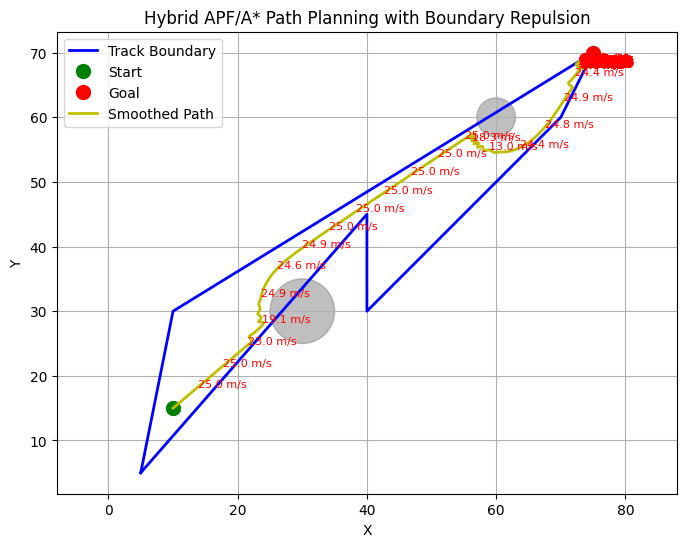

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path as MplPath
from scipy.interpolate import splprep, splev
from shapely.geometry import Point, Polygon  # For boundary distance
from heapq import heappush, heappop

# ----- Helper functions -----

def is_inside_track(point, track_bounds):
    """Check if a point is inside the polygon defined by track_bounds."""
    poly_path = MplPath(track_bounds)
    return poly_path.contains_point(point)

def heuristic(p1, p2):
    """Euclidean distance between two points."""
    return np.hypot(p1[0] - p2[0], p1[1] - p2[1])

def find_farthest_goal(car_location, track_bounds):
    """Generate a goal point as the farthest reachable point within track bounds."""
    max_distance = -1
    best_goal = car_location

    xs, ys = zip(*track_bounds)
    min_x, max_x = int(min(xs)), int(max(xs))
    min_y, max_y = int(min(ys)), int(max(ys))

    for x in range(min_x, max_x + 1):
        for y in range(min_y, max_y + 1):
            candidate = (x, y)
            if is_inside_track(candidate, track_bounds):
                distance = heuristic(car_location, candidate)
                if distance > max_distance:
                    max_distance = distance
                    best_goal = candidate
    return best_goal

def smooth_path(path, smoothing_factor=3):
    """Apply spline smoothing to the path."""
    if len(path) < 3:
        return path
    x, y = zip(*path)
    tck, u = splprep([x, y], s=smoothing_factor)
    u_new = np.linspace(0, 1, len(path) * 10)
    smooth_x, smooth_y = splev(u_new, tck)
    return list(zip(smooth_x, smooth_y))

def calculate_target_velocity(path, max_speed=25, min_speed=5, curvature_threshold=0.3):
    """
    Calculate target velocity based on curvature.
    Lower speeds are assigned where curvature is high.
    """
    velocities = []
    n = len(path)
    velocities.append(max_speed)
    for i in range(1, n-1):
        p_prev = np.array(path[i-1])
        p_curr = np.array(path[i])
        p_next = np.array(path[i+1])
        v1 = p_curr - p_prev
        v2 = p_next - p_curr
        norm1 = np.linalg.norm(v1)
        norm2 = np.linalg.norm(v2)
        if norm1 < 1e-3 or norm2 < 1e-3:
            curvature = 0
        else:
            dot = np.clip(np.dot(v1, v2) / (norm1 * norm2), -1.0, 1.0)
            angle = np.arccos(dot)
            curvature = angle
        factor = np.clip(curvature / curvature_threshold, 0, 1)
        speed = max_speed - (max_speed - min_speed) * factor
        velocities.append(speed)
    velocities.append(max_speed)
    return velocities

# ----- A* Fallback Implementation -----

def astar_path(start, goal, obstacles, track_bounds, resolution=1.0):
    """
    Simple grid-based A* search from start to goal.
    Obstacles are checked (using Euclidean distance) and points must be inside track.
    """
    start = (int(round(start[0])), int(round(start[1])))
    goal = (int(round(goal[0])), int(round(goal[1])))
    xs, ys = zip(*track_bounds)
    min_x, max_x = int(min(xs)), int(max(xs))
    min_y, max_y = int(min(ys)), int(max(ys))

    def is_valid(node):
        # Check inside track
        if not is_inside_track(node, track_bounds):
            return False
        # Check obstacles: node must be outside each obstacle.
        for (center, radius) in obstacles:
            if np.linalg.norm(np.array(node) - np.array(center)) < radius:
                return False
        return True

    open_set = []
    heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}

    while open_set:
        _, current = heappop(open_set)
        if current == goal:
            path = [current]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            return path[::-1]
        for dx in [-resolution, 0, resolution]:
            for dy in [-resolution, 0, resolution]:
                if dx == 0 and dy == 0:
                    continue
                neighbor = (int(round(current[0] + dx)), int(round(current[1] + dy)))
                if neighbor[0] < min_x or neighbor[0] > max_x or neighbor[1] < min_y or neighbor[1] > max_y:
                    continue
                if not is_valid(neighbor):
                    continue
                tentative_g = g_score[current] + np.hypot(dx, dy)
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    g_score[neighbor] = tentative_g
                    priority = tentative_g + heuristic(neighbor, goal)
                    heappush(open_set, (priority, neighbor))
                    came_from[neighbor] = current
    return None

# ----- Hybrid APF Algorithm -----

def apf_path_hybrid(car_location, goal, obstacles, track_bounds,
                    k_att=0.8, k_rep=200.0, d0=15.0, step_size=0.8,
                    tol=1.0, max_iters=1000, boundary_threshold=5.0, k_boundary=150.0):
    """
    Generate a path using APF with enhancements:
      - Adds repulsion from boundaries using Shapely.
      - Monitors for local minima (stuck condition) and then falls back on A*.
    """
    current = np.array(car_location, dtype=float)
    goal = np.array(goal, dtype=float)
    path = [tuple(current)]
    iters = 0
    stuck_counter = 0
    track_poly = Polygon(track_bounds)

    while np.linalg.norm(current - goal) > tol and iters < max_iters:
        # Attractive force toward goal.
        f_att = -k_att * (current - goal)

        # Repulsive force from obstacles.
        f_rep = np.zeros(2)
        for (obs_center, obs_radius) in obstacles:
            obs_center = np.array(obs_center, dtype=float)
            vec = current - obs_center
            dist = np.linalg.norm(vec) - obs_radius
            if dist < 1e-3:
                dist = 1e-3
            if dist < d0:
                repulsive = k_rep * (1.0/dist - 1.0/d0) / (dist**2)
                f_rep += repulsive * (vec / np.linalg.norm(vec))

        # Repulsive force from boundary.
        point_obj = Point(current)
        dist_bound = track_poly.exterior.distance(point_obj)
        f_bound = np.zeros(2)
        if dist_bound < boundary_threshold:
            nearest = track_poly.exterior.interpolate(track_poly.exterior.project(point_obj))
            bound_vec = current - np.array([nearest.x, nearest.y])
            norm_bound_vec = np.linalg.norm(bound_vec)
            if norm_bound_vec > 1e-3:
                bound_dir = bound_vec / norm_bound_vec
                f_bound = k_boundary * (1.0/dist_bound - 1.0/boundary_threshold) / (dist_bound**2) * bound_dir

        # Sum forces.
        f_total = f_att + f_rep + f_bound
        norm_f = np.linalg.norm(f_total)
        if norm_f < 1e-3:
            stuck_counter += 1
            # If stuck for too many iterations, try a random perturbation
            if stuck_counter > 20:
                print("APF stuck in local minima; switching to A* fallback...")
                astar_seg = astar_path(current, goal, obstacles, track_bounds, resolution=1.0)
                if astar_seg is not None:
                    # Append A* path (skipping duplicate current position)
                    path += astar_seg[1:]
                break
            # Apply a small random kick if forces nearly cancel.
            f_total = np.random.uniform(-1, 1, size=2)
            norm_f = np.linalg.norm(f_total)
        else:
            stuck_counter = 0

        direction = f_total / norm_f
        next_point = current + step_size * direction

        # Validate next point; if off-track, reduce step size and try again.
        if not is_inside_track(next_point, track_bounds):
            next_point = current + (step_size/2) * direction
            if not is_inside_track(next_point, track_bounds):
                break

        current = next_point
        path.append(tuple(current))
        iters += 1

    return path

# ----- Visualization -----

def visualize_path(track_bounds, obstacles, car_location, goal, path, velocities):
    fig, ax = plt.subplots(figsize=(8, 6))
    # Draw track boundaries.
    tb = np.array(track_bounds)
    ax.plot(np.append(tb[:,0], tb[0,0]), np.append(tb[:,1], tb[0,1]), 'b-', lw=2, label='Track Boundary')
    # Draw obstacles.
    for (center, radius) in obstacles:
        circle = plt.Circle(center, radius, color='gray', alpha=0.5)
        ax.add_patch(circle)
    # Draw start and goal.
    ax.plot(car_location[0], car_location[1], 'go', markersize=10, label='Start')
    ax.plot(goal[0], goal[1], 'ro', markersize=10, label='Goal')
    # Draw the smoothed path.
    if path:
        px, py = zip(*path)
        ax.plot(px, py, 'y-', lw=2, label='Smoothed Path')
        # Annotate target velocities every ~5 units.
        distance_acc = 0
        for i in range(1, len(path)):
            p_prev = np.array(path[i-1])
            p_curr = np.array(path[i])
            segment_length = np.linalg.norm(p_curr - p_prev)
            distance_acc += segment_length
            if distance_acc >= 5:
                vel = velocities[min(i, len(velocities)-1)]
                ax.text(p_curr[0], p_curr[1], f"{vel:.1f} m/s", fontsize=8, color='red')
                distance_acc = 0

    ax.legend(loc='upper left')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title("Hybrid APF/A* Path Planning with Boundary Repulsion")
    ax.grid(True)
    ax.axis('equal')
    plt.show()

# ----- Main simulation parameters -----

# Define track boundaries (polygon vertices).
track_bounds = [(5, 5), (10, 30), (75, 70), (70, 60), (40, 30), (40, 45)]
# Starting position.
car_location = (10, 15)
# Define obstacles as (center, radius) tuples.
obstacles = [
    ((30, 30), 5),
    ((60, 60), 3)
]
# Determine goal using the farthest-point strategy.
goal = find_farthest_goal(car_location, track_bounds)

# Generate a path using the hybrid APF/A* algorithm.
raw_path = apf_path_hybrid(car_location, goal, obstacles, track_bounds,
                           k_att=0.8, k_rep=200.0, d0=15.0, step_size=0.8,
                           tol=1.0, max_iters=1000, boundary_threshold=0.5, k_boundary=150.0)

# Smooth the path.
smoothed_path = smooth_path(raw_path, smoothing_factor=3)
# Calculate target velocities along the path.
velocities = calculate_target_velocity(smoothed_path, max_speed=25, min_speed=5, curvature_threshold=0.3)
# Visualize the final path.
visualize_path(track_bounds, obstacles, car_location, goal, smoothed_path, velocities)


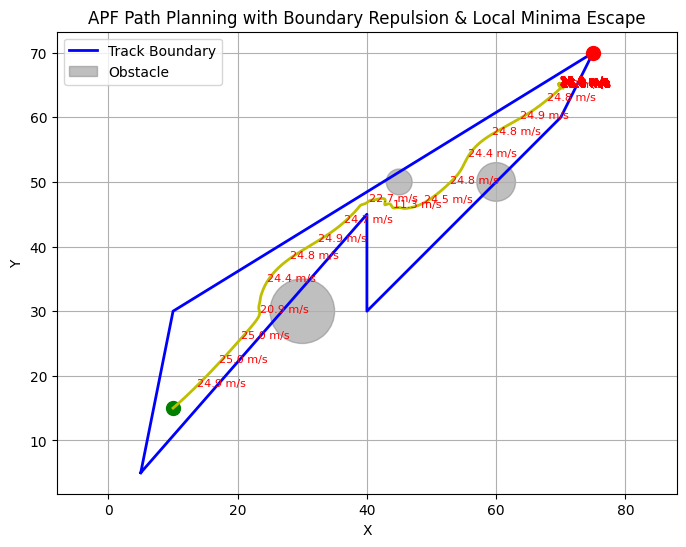

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path as MplPath
from scipy.interpolate import splprep, splev

# ----- Helper functions -----

def is_inside_track(point, track_bounds):
    """Check if a point is inside the polygon defined by track_bounds."""
    poly_path = MplPath(track_bounds)
    return poly_path.contains_point(point)

def heuristic(p1, p2):
    """Euclidean distance between two points."""
    return np.hypot(p1[0] - p2[0], p1[1] - p2[1])

def find_farthest_goal(car_location, track_bounds):
    """Generate a goal point as the farthest reachable point within track bounds."""
    max_distance = -1
    best_goal = car_location

    xs, ys = zip(*track_bounds)
    min_x, max_x = int(min(xs)), int(max(xs))
    min_y, max_y = int(min(ys)), int(max(ys))

    for x in range(min_x, max_x + 1):
        for y in range(min_y, max_y + 1):
            candidate = (x, y)
            if is_inside_track(candidate, track_bounds):
                distance = heuristic(car_location, candidate)
                if distance > max_distance:
                    max_distance = distance
                    best_goal = candidate
    return best_goal

def smooth_path(path, smoothing_factor=3):
    """Apply spline smoothing to the path."""
    x, y = zip(*path)
    tck, u = splprep([x, y], s=smoothing_factor)
    u_new = np.linspace(0, 1, len(path) * 10)
    smooth_x, smooth_y = splev(u_new, tck)
    return list(zip(smooth_x, smooth_y))

def calculate_target_velocity(path, max_speed=25, min_speed=5, curvature_threshold=0.3):
    """
    Calculate target velocity based on curvature.
    Lower speeds are assigned where curvature is high.
    """
    velocities = []
    n = len(path)
    # For endpoints, assign max_speed
    velocities.append(max_speed)
    for i in range(1, n-1):
        # Calculate vectors from previous->current and current->next
        p_prev = np.array(path[i-1])
        p_curr = np.array(path[i])
        p_next = np.array(path[i+1])

        v1 = p_curr - p_prev
        v2 = p_next - p_curr

        # Normalize vectors; if a vector is nearly zero, skip curvature calc
        norm1 = np.linalg.norm(v1)
        norm2 = np.linalg.norm(v2)
        if norm1 < 1e-3 or norm2 < 1e-3:
            curvature = 0
        else:
            # Angle between v1 and v2
            dot = np.clip(np.dot(v1, v2) / (norm1 * norm2), -1.0, 1.0)
            angle = np.arccos(dot)
            curvature = angle

        # Linearly scale the speed: high curvature -> low speed
        factor = np.clip(curvature / curvature_threshold, 0, 1)
        speed = max_speed - (max_speed - min_speed) * factor
        velocities.append(speed)
    velocities.append(max_speed)
    return velocities

# ----- APF algorithm implementation -----

def repulsive_force_boundary(current_pos, track_bounds, k_rep_boundary=50.0, d0_boundary=10.0):
    """
    Calculate repulsive force from track boundaries (polygon edges).
    """
    f_rep_boundary = np.zeros(2)
    num_bounds = len(track_bounds)
    for i in range(num_bounds):
        p1 = np.array(track_bounds[i])
        p2 = np.array(track_bounds[(i + 1) % num_bounds])  # Next point, loop back to start

        segment_vec = p2 - p1
        segment_len_sq = np.dot(segment_vec, segment_vec)

        # Project current position onto the segment
        if segment_len_sq < 1e-6: # Segment too short to consider
            continue

        t = np.dot(current_pos - p1, segment_vec) / segment_len_sq
        t = np.clip(t, 0, 1) # Clamp t to be within the segment [0, 1]
        proj_point = p1 + t * segment_vec

        dist_vec = current_pos - proj_point
        dist = np.linalg.norm(dist_vec)

        if dist < d0_boundary:
            repulsive_magnitude = k_rep_boundary * (1.0/dist - 1.0/d0_boundary) / (dist**2) if dist > 1e-3 else float('inf')
            f_rep_boundary += repulsive_magnitude * (dist_vec / (dist + 1e-6)) # Avoid division by zero

    return f_rep_boundary

def apf_path(car_location, goal, obstacles, track_bounds,
             k_att=0.8, k_rep=200.0, d0=15.0, step_size=0.5,
             tol=1.0, max_iters=1000, k_rep_boundary=50.0, d0_boundary=10.0,
             local_minima_threshold=0.1, random_force_magnitude=1.0): # Added boundary repulsion params and local minima params
    """
    Generate a path from car_location to goal using Artificial Potential Field (APF).
    Includes boundary repulsion and local minima escape.
    """
    current = np.array(car_location, dtype=float)
    goal = np.array(goal, dtype=float)
    path = [tuple(current)]
    iters = 0
    stuck_iters = 0 # Counter for consecutive stuck iterations

    while np.linalg.norm(current - goal) > tol and iters < max_iters:
        # Attractive force: pulls toward goal
        f_att = -k_att * (current - goal)

        # Repulsive force: pushes away from obstacles
        f_rep = np.zeros(2)
        for (obs_center, obs_radius) in obstacles:
            obs_center = np.array(obs_center, dtype=float)
            vec = current - obs_center
            dist = np.linalg.norm(vec) - obs_radius  # distance from obstacle surface
            if dist < 1e-3:
                dist = 1e-3
            if dist < d0:
                # Repulsive force magnitude; note: divided by squared distance for stronger effect when close
                repulsive = k_rep * (1.0/dist - 1.0/d0) / (dist**2)
                f_rep += repulsive * (vec / np.linalg.norm(vec))

        # Repulsive force from track boundaries
        f_rep_bound = repulsive_force_boundary(current, track_bounds, k_rep_boundary, d0_boundary)

        # Sum the forces
        f_total = f_att + f_rep + f_rep_bound

        # Local Minima Check and Escape
        norm_f = np.linalg.norm(f_total)
        if norm_f < local_minima_threshold:
            stuck_iters += 1
            if stuck_iters > 20: # If stuck for a few iterations, apply random force
                random_force = np.random.uniform(-1, 1, 2) * random_force_magnitude
                f_total += random_force
                stuck_iters = 0 # Reset stuck counter after perturbation
        else:
            stuck_iters = 0 # Reset if moving

        # Normalize the force vector to get direction
        norm_f = np.linalg.norm(f_total)
        if norm_f < 1e-3:
            break # Forces cancel out even after perturbation, consider stuck

        direction = f_total / norm_f

        # Update current position with step size in the direction of net force
        next_point = current + step_size * direction

        # Ensure that the new point is within track bounds; if not, project it inside.
        if not is_inside_track(next_point, track_bounds):
            # If outside, try a smaller step in the same direction
            next_point = current + (step_size/2) * direction
            if not is_inside_track(next_point, track_bounds):
                # If still outside, break the loop
                break

        current = next_point
        path.append(tuple(current))
        iters += 1

    return path

# ----- Visualization -----

def visualize_path(track_bounds, obstacles, car_location, goal, path, velocities):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Draw track boundaries
    tb = np.array(track_bounds)
    ax.plot(np.append(tb[:,0], tb[0,0]), np.append(tb[:,1], tb[0,1]), 'b-', lw=2, label='Track Boundary')

    # Draw obstacles as circles
    for (center, radius) in obstacles:
        circle = plt.Circle(center, radius, color='gray', alpha=0.5, label='Obstacle')
        ax.add_patch(circle)
    # Ensure obstacles don't create duplicate labels in the legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    # Draw start and goal
    ax.plot(car_location[0], car_location[1], 'go', markersize=10, label='Start')
    ax.plot(goal[0], goal[1], 'ro', markersize=10, label='Goal')

    # Draw smoothed path
    if path:
        px, py = zip(*path)
        ax.plot(px, py, 'y-', lw=2, label='Smoothed Path')

    # Annotate target velocities more frequently along the path
    distance_acc = 0
    for i in range(1, len(path)):
        p_prev = np.array(path[i-1])
        p_curr = np.array(path[i])
        segment_length = np.linalg.norm(p_curr - p_prev)
        distance_acc += segment_length
        if distance_acc >= 5: # Reduced distance for more frequent velocity markers
            vel = velocities[min(i, len(velocities)-1)]
            ax.text(p_curr[0], p_curr[1], f"{vel:.1f} m/s", fontsize=8, color='red')
            distance_acc = 0


    ax.legend(by_label.values(), by_label.keys(), loc='upper left') # Adjusted legend location
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title("APF Path Planning with Boundary Repulsion & Local Minima Escape")
    ax.grid(True)
    ax.axis('equal') # Keep aspect ratio
    plt.show()

# ----- Main simulation parameters -----

# Define the track as provided (polygon vertices)
track_bounds = [(5, 5), (10, 30), (75, 70), (70, 60), (40, 30), (40, 45)]

# Starting position of the car
car_location = (10, 15)

# Define obstacles as a list of tuples: (center, radius)
obstacles = [
    ((30, 30), 5),
    ((45, 50), 2) , ((60, 50), 3) # added obstacle again to test local minima
]

# Determine a goal point (using the provided strategy)
goal = find_farthest_goal(car_location, track_bounds)

# Generate the raw path using the APF algorithm
raw_path = apf_path(car_location, goal, obstacles, track_bounds,
                     k_att=0.8, k_rep=200.0, d0=15.0, step_size=0.8, tol=1.0, # APF params
                     k_rep_boundary=80.0, d0_boundary=20.0, # Boundary repulsion params
                     local_minima_threshold=0.1, random_force_magnitude=2.0) # Local minima params

# Smooth the path using spline interpolation for a smooth curve
smoothed_path = smooth_path(raw_path, smoothing_factor=3)

# Calculate target velocities based on curvature along the smoothed path
velocities = calculate_target_velocity(smoothed_path, max_speed=25, min_speed=5, curvature_threshold=0.3)

# Visualize the results
visualize_path(track_bounds, obstacles, car_location, goal, smoothed_path, velocities)

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path as MplPath
from scipy.interpolate import splprep, splev
from shapely.geometry import Point, Polygon

# ----- Helper functions -----

def is_inside_track(point, track_bounds):
    """Check if a point is inside the polygon defined by track_bounds."""
    poly_path = MplPath(track_bounds)
    return poly_path.contains_point(point)

def heuristic(p1, p2):
    """Euclidean distance between two points."""
    return np.hypot(p1[0] - p2[0], p1[1] - p2[1])

def find_farthest_goal(car_location, track_bounds):
    """Generate a goal point as the farthest reachable point within track bounds."""
    max_distance = -1
    best_goal = car_location

    xs, ys = zip(*track_bounds)
    min_x, max_x = int(min(xs)), int(max(xs))
    min_y, max_y = int(min(ys)), int(max(ys))

    for x in range(min_x, max_x + 1):
        for y in range(min_y, max_y + 1):
            candidate = (x, y)
            if is_inside_track(candidate, track_bounds):
                distance = heuristic(car_location, candidate)
                if distance > max_distance:
                    max_distance = distance
                    best_goal = candidate
    return best_goal

def adjust_goal(goal, track_bounds, min_distance=5.0):
    """
    Adjust the goal point if it is too close to the track boundary.
    If the goal is within min_distance from the boundary, it is pushed inward.
    """
    poly = Polygon(track_bounds)
    p = Point(goal)
    dist = poly.exterior.distance(p)
    if dist < min_distance:
        # Get the nearest point on the boundary.
        proj = poly.exterior.interpolate(poly.exterior.project(p))
        # Push the goal inward along the direction from the projected point.
        direction = np.array(goal) - np.array([proj.x, proj.y])
        norm = np.linalg.norm(direction)
        if norm < 1e-3:
            return goal  # Can't determine a valid direction.
        direction = direction / norm
        new_goal = np.array(goal) + direction * (min_distance - dist)
        return tuple(new_goal)
    return goal

def smooth_path(path, smoothing_factor=3):
    """Apply spline smoothing to the path."""
    if len(path) < 3:
        return path
    x, y = zip(*path)
    tck, u = splprep([x, y], s=smoothing_factor)
    u_new = np.linspace(0, 1, len(path) * 10)
    smooth_x, smooth_y = splev(u_new, tck)
    return list(zip(smooth_x, smooth_y))

def calculate_target_velocity(path, max_speed=25, min_speed=5, curvature_threshold=0.3):
    """
    Calculate target velocity based on curvature.
    Lower speeds are assigned where curvature is high.
    """
    velocities = []
    n = len(path)
    velocities.append(max_speed)  # For the starting point.
    for i in range(1, n-1):
        p_prev = np.array(path[i-1])
        p_curr = np.array(path[i])
        p_next = np.array(path[i+1])

        v1 = p_curr - p_prev
        v2 = p_next - p_curr

        norm1 = np.linalg.norm(v1)
        norm2 = np.linalg.norm(v2)
        if norm1 < 1e-3 or norm2 < 1e-3:
            curvature = 0
        else:
            dot = np.clip(np.dot(v1, v2) / (norm1 * norm2), -1.0, 1.0)
            angle = np.arccos(dot)
            curvature = angle

        factor = np.clip(curvature / curvature_threshold, 0, 1)
        speed = max_speed - (max_speed - min_speed) * factor
        velocities.append(speed)
    velocities.append(max_speed)
    return velocities

def repulsive_force_boundary(current_pos, track_bounds, k_rep_boundary=50.0, d0_boundary=10.0):
    """
    Calculate repulsive force from track boundaries (polygon edges).
    """
    f_rep_boundary = np.zeros(2)
    num_bounds = len(track_bounds)
    for i in range(num_bounds):
        p1 = np.array(track_bounds[i])
        p2 = np.array(track_bounds[(i + 1) % num_bounds])  # Next point, loop back to start

        segment_vec = p2 - p1
        segment_len_sq = np.dot(segment_vec, segment_vec)
        if segment_len_sq < 1e-6:
            continue

        # Project current position onto the segment.
        t = np.dot(current_pos - p1, segment_vec) / segment_len_sq
        t = np.clip(t, 0, 1)
        proj_point = p1 + t * segment_vec

        dist_vec = current_pos - proj_point
        dist = np.linalg.norm(dist_vec)
        if dist < d0_boundary:
            repulsive_magnitude = k_rep_boundary * (1.0/dist - 1.0/d0_boundary) / (dist**2) if dist > 1e-3 else float('inf')
            f_rep_boundary += repulsive_magnitude * (dist_vec / (dist + 1e-6))
    return f_rep_boundary

def apf_path(car_location, goal, obstacles, track_bounds,
             k_att=0.8, k_rep=200.0, d0=15.0, step_size=0.5,
             tol=1.0, max_iters=1000, k_rep_boundary=80.0, d0_boundary=20.0,
             local_minima_threshold=0.1, random_force_magnitude=2.0, damping=0.5):
    """
    Generate a path from car_location to goal using Artificial Potential Field (APF).
    Includes boundary repulsion, local minima escape, and a damping term to smooth oscillations.
    """
    current = np.array(car_location, dtype=float)
    goal = np.array(goal, dtype=float)
    path = [tuple(current)]
    iters = 0
    stuck_iters = 0  # Counter for consecutive stuck iterations
    prev_direction = None

    while np.linalg.norm(current - goal) > tol and iters < max_iters:
        # Attractive force: pulls toward goal.
        f_att = -k_att * (current - goal)

        # Repulsive force from obstacles.
        f_rep = np.zeros(2)
        for (obs_center, obs_radius) in obstacles:
            obs_center = np.array(obs_center, dtype=float)
            vec = current - obs_center
            dist = np.linalg.norm(vec) - obs_radius  # distance from obstacle surface
            if dist < 1e-3:
                dist = 1e-3
            if dist < d0:
                repulsive = k_rep * (1.0/dist - 1.0/d0) / (dist**2)
                f_rep += repulsive * (vec / np.linalg.norm(vec))

        # Repulsive force from track boundaries.
        f_rep_bound = repulsive_force_boundary(current, track_bounds, k_rep_boundary, d0_boundary)

        # Sum the forces.
        f_total = f_att + f_rep + f_rep_bound
        norm_f = np.linalg.norm(f_total)
        if norm_f < local_minima_threshold:
            stuck_iters += 1
            if stuck_iters > 20:  # If stuck for several iterations, add a random perturbation.
                random_force = np.random.uniform(-1, 1, 2) * random_force_magnitude
                f_total += random_force
                stuck_iters = 0
        else:
            stuck_iters = 0

        # Normalize and apply damping to smooth out oscillations.
        new_direction = f_total / (norm_f + 1e-6)
        if prev_direction is not None:
            # Blend the new direction with the previous one.
            direction = (1 - damping) * new_direction + damping * prev_direction
            direction = direction / (np.linalg.norm(direction) + 1e-6)
        else:
            direction = new_direction
        prev_direction = direction.copy()

        next_point = current + step_size * direction

        # Ensure that the new point is within track bounds; if not, try a smaller step.
        if not is_inside_track(next_point, track_bounds):
            next_point = current + (step_size/2) * direction
            if not is_inside_track(next_point, track_bounds):
                break

        current = next_point
        path.append(tuple(current))
        iters += 1

    return path

# ----- Visualization -----

def visualize_path(track_bounds, obstacles, car_location, goal, path, velocities):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Draw track boundaries.
    tb = np.array(track_bounds)
    ax.plot(np.append(tb[:,0], tb[0,0]), np.append(tb[:,1], tb[0,1]), 'b-', lw=2, label='Track Boundary')

    # Draw obstacles as circles.
    for (center, radius) in obstacles:
        circle = plt.Circle(center, radius, color='gray', alpha=0.5, label='Obstacle')
        ax.add_patch(circle)
    # Ensure no duplicate legend labels.
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    # Draw start and goal.
    ax.plot(car_location[0], car_location[1], 'go', markersize=10, label='Start')
    ax.plot(goal[0], goal[1], 'ro', markersize=10, label='Goal')

    # Draw smoothed path.
    if path:
        px, py = zip(*path)
        ax.plot(px, py, 'y-', lw=2, label='Smoothed Path')
        # Annotate target velocities every ~5 units.
        distance_acc = 0
        for i in range(1, len(path)):
            p_prev = np.array(path[i-1])
            p_curr = np.array(path[i])
            segment_length = np.linalg.norm(p_curr - p_prev)
            distance_acc += segment_length
            if distance_acc >= 5:
                vel = velocities[min(i, len(velocities)-1)]
                ax.text(p_curr[0], p_curr[1], f"{vel:.1f} m/s", fontsize=8, color='red')
                distance_acc = 0

    ax.legend(by_label.values(), by_label.keys(), loc='upper left')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title("APF Path Planning with Boundary Repulsion, Damping & Goal Adjustment")
    ax.grid(True)
    ax.axis('equal')
    plt.show()

# ----- Main simulation parameters -----

# Define the track as provided (polygon vertices).
track_bounds = [(5, 5), (10, 30), (75, 70), (70, 60), (40, 30), (40, 45)]

# Starting position of the car.
car_location = (10, 15)

# Define obstacles as a list of tuples: (center, radius).
obstacles = [
    ((30, 30), 5),
    ((45, 50), 2),
    ((60, 50), 3)
]

# Determine a goal point (using the provided strategy) and adjust if too close to a corner.
raw_goal = find_farthest_goal(car_location, track_bounds)
goal = adjust_goal(raw_goal, track_bounds, min_distance=5.0)

# Generate the raw path using the refined APF algorithm.
raw_path = apf_path(car_location, goal, obstacles, track_bounds,
                    k_att=0.8, k_rep=200.0, d0=15.0, step_size=0.8, tol=1.0,
                    k_rep_boundary=80.0, d0_boundary=20.0,
                    local_minima_threshold=0.1, random_force_magnitude=2.0,
                    damping=0.8)

# Smooth the path using spline interpolation.
smoothed_path = smooth_path(raw_path, smoothing_factor=3)

# Calculate target velocities based on curvature along the smoothed path.
velocities = calculate_target_velocity(smoothed_path, max_speed=25, min_speed=5, curvature_threshold=0.3)

# # Visualize the results.
# visualize_path(track_bounds, obstacles, car_location, goal, smoothed_path, velocities)


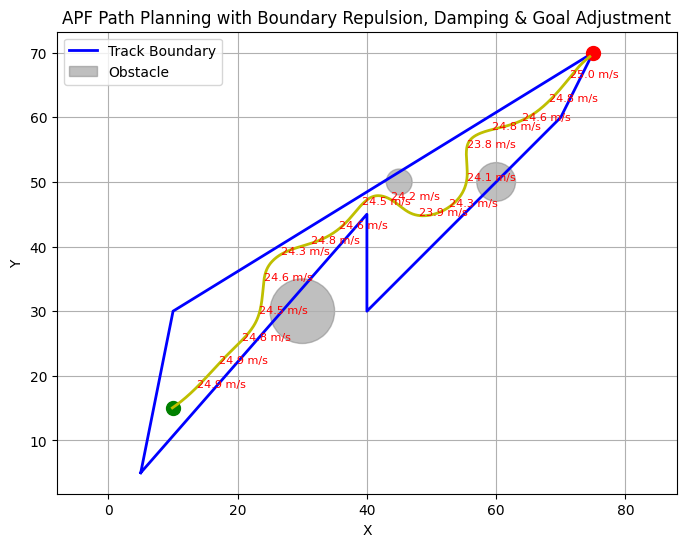

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path as MplPath
from scipy.interpolate import splprep, splev
from shapely.geometry import Point, Polygon

# ----- Helper functions -----

def is_inside_track(point, track_bounds):
    """
    Check if a point is inside the polygon defined by track_bounds.

    Parameters:
    - point: Tuple (x, y) representing the point to check.
    - track_bounds: List of tuples representing the polygon vertices.

    Returns:
    - bool: True if the point is inside the polygon, False otherwise.
    """
    poly_path = MplPath(track_bounds)
    return poly_path.contains_point(point)

def heuristic(p1, p2):
    """
    Calculate the Euclidean distance between two points.

    Parameters:
    - p1: Tuple (x, y) representing the first point.
    - p2: Tuple (x, y) representing the second point.

    Returns:
    - float: Euclidean distance between the two points.
    """
    return np.hypot(p1[0] - p2[0], p1[1] - p2[1])

def find_farthest_goal(car_location, track_bounds):
    """
    Generate a goal point as the farthest reachable point within track bounds.

    Parameters:
    - car_location: Tuple (x, y) representing the current location of the car.
    - track_bounds: List of tuples representing the polygon vertices.

    Returns:
    - Tuple (x, y) representing the farthest goal point.
    """
    max_distance = -1
    best_goal = car_location
    poly = Polygon(track_bounds)

    for x, y in poly.exterior.coords:
        candidate = (x, y)
        if is_inside_track(candidate, track_bounds):
            distance = heuristic(car_location, candidate)
            if distance > max_distance:
                max_distance = distance
                best_goal = candidate
    return best_goal

def adjust_goal(goal, track_bounds, min_distance=5.0):
    """
    Adjust the goal point if it is too close to the track boundary.

    Parameters:
    - goal: Tuple (x, y) representing the goal point.
    - track_bounds: List of tuples representing the polygon vertices.
    - min_distance: Minimum distance from the boundary (default is 5.0).

    Returns:
    - Tuple (x, y) representing the adjusted goal point.
    """
    poly = Polygon(track_bounds)
    p = Point(goal)
    dist = poly.exterior.distance(p)
    if dist < min_distance:
        proj = poly.exterior.interpolate(poly.exterior.project(p))
        direction = np.array(goal) - np.array([proj.x, proj.y])
        norm = np.linalg.norm(direction)
        if norm < 1e-3:
            return goal
        direction = direction / norm
        new_goal = np.array(goal) + direction * (min_distance - dist)
        return tuple(new_goal)
    return goal

def smooth_path(path, smoothing_factor=3):
    """
    Apply spline smoothing to the path.

    Parameters:
    - path: List of tuples representing the path points.
    - smoothing_factor: Smoothing factor for the spline (default is 3).

    Returns:
    - List of tuples representing the smoothed path.
    """
    if len(path) < 3:
        return path
    x, y = zip(*path)
    tck, u = splprep([x, y], s=smoothing_factor)
    u_new = np.linspace(0, 1, len(path) * 10)
    smooth_x, smooth_y = splev(u_new, tck)
    return list(zip(smooth_x, smooth_y))

def calculate_target_velocity(path, max_speed=25, min_speed=5, curvature_threshold=0.3):
    """
    Calculate target velocity based on curvature.

    Parameters:
    - path: List of tuples representing the path points.
    - max_speed: Maximum speed (default is 25).
    - min_speed: Minimum speed (default is 5).
    - curvature_threshold: Curvature threshold for speed adjustment (default is 0.3).

    Returns:
    - List of float representing the target velocities for each path point.
    """
    velocities = [max_speed]
    n = len(path)

    for i in range(1, n-1):
        p_prev = np.array(path[i-1])
        p_curr = np.array(path[i])
        p_next = np.array(path[i+1])

        v1 = p_curr - p_prev
        v2 = p_next - p_curr

        norm1 = np.linalg.norm(v1)
        norm2 = np.linalg.norm(v2)
        if norm1 < 1e-3 or norm2 < 1e-3:
            curvature = 0
        else:
            dot = np.clip(np.dot(v1, v2) / (norm1 * norm2), -1.0, 1.0)
            angle = np.arccos(dot)
            curvature = angle

        factor = np.clip(curvature / curvature_threshold, 0, 1)
        speed = max_speed - (max_speed - min_speed) * factor
        velocities.append(speed)
    velocities.append(max_speed)
    return velocities

def repulsive_force_boundary(current_pos, track_bounds, k_rep_boundary=50.0, d0_boundary=10.0):
    """
    Calculate repulsive force from track boundaries (polygon edges).

    Parameters:
    - current_pos: Array [x, y] representing the current position.
    - track_bounds: List of tuples representing the polygon vertices.
    - k_rep_boundary: Repulsive force constant (default is 50.0).
    - d0_boundary: Distance threshold for repulsion (default is 10.0).

    Returns:
    - Array [fx, fy] representing the repulsive force from boundaries.
    """
    f_rep_boundary = np.zeros(2)
    num_bounds = len(track_bounds)
    for i in range(num_bounds):
        p1 = np.array(track_bounds[i])
        p2 = np.array(track_bounds[(i + 1) % num_bounds])

        segment_vec = p2 - p1
        segment_len_sq = np.dot(segment_vec, segment_vec)
        if segment_len_sq < 1e-6:
            continue

        t = np.dot(current_pos - p1, segment_vec) / segment_len_sq
        t = np.clip(t, 0, 1)
        proj_point = p1 + t * segment_vec

        dist_vec = current_pos - proj_point
        dist = np.linalg.norm(dist_vec)
        if dist < d0_boundary:
            repulsive_magnitude = k_rep_boundary * (1.0/dist - 1.0/d0_boundary) / (dist**2) if dist > 1e-3 else float('inf')
            f_rep_boundary += repulsive_magnitude * (dist_vec / (dist + 1e-6))
    return f_rep_boundary

def apf_path(car_location, goal, obstacles, track_bounds,
             k_att=0.8, k_rep=200.0, d0=15.0, step_size=0.5,
             tol=1.0, max_iters=1000, k_rep_boundary=80.0, d0_boundary=20.0,
             local_minima_threshold=0.1, random_force_magnitude=2.0, damping=0.5):
    """
    Generate a path from car_location to goal using Artificial Potential Field (APF).

    Parameters:
    - car_location: Tuple (x, y) representing the current location of the car.
    - goal: Tuple (x, y) representing the goal point.
    - obstacles: List of tuples representing obstacle centers and radii.
    - track_bounds: List of tuples representing the polygon vertices.
    - k_att: Attractive force constant (default is 0.8).
    - k_rep: Repulsive force constant (default is 200.0).
    - d0: Distance threshold for obstacle repulsion (default is 15.0).
    - step_size: Step size for each iteration (default is 0.5).
    - tol: Tolerance for reaching the goal (default is 1.0).
    - max_iters: Maximum number of iterations (default is 1000).
    - k_rep_boundary: Repulsive force constant for boundaries (default is 80.0).
    - d0_boundary: Distance threshold for boundary repulsion (default is 20.0).
    - local_minima_threshold: Threshold for detecting local minima (default is 0.1).
    - random_force_magnitude: Magnitude of random force to escape local minima (default is 2.0).
    - damping: Damping factor for smoothing oscillations (default is 0.5).

    Returns:
    - List of tuples representing the generated path.
    """
    current = np.array(car_location, dtype=float)
    goal = np.array(goal, dtype=float)
    path = [tuple(current)]
    iters = 0
    stuck_iters = 0
    prev_direction = None

    while np.linalg.norm(current - goal) > tol and iters < max_iters:
        f_att = -k_att * (current - goal)
        f_rep = np.zeros(2)
        for (obs_center, obs_radius) in obstacles:
            obs_center = np.array(obs_center, dtype=float)
            vec = current - obs_center
            dist = np.linalg.norm(vec) - obs_radius
            if dist < 1e-3:
                dist = 1e-3
            if dist < d0:
                repulsive = k_rep * (1.0/dist - 1.0/d0) / (dist**2)
                f_rep += repulsive * (vec / np.linalg.norm(vec))

        f_rep_bound = repulsive_force_boundary(current, track_bounds, k_rep_boundary, d0_boundary)
        f_total = f_att + f_rep + f_rep_bound
        norm_f = np.linalg.norm(f_total)
        if norm_f < local_minima_threshold:
            stuck_iters += 1
            if stuck_iters > 20:
                random_force = np.random.uniform(-1, 1, 2) * random_force_magnitude
                f_total += random_force
                stuck_iters = 0
        else:
            stuck_iters = 0

        new_direction = f_total / (norm_f + 1e-6)
        if prev_direction is not None:
            direction = (1 - damping) * new_direction + damping * prev_direction
            direction = direction / (np.linalg.norm(direction) + 1e-6)
        else:
            direction = new_direction
        prev_direction = direction.copy()

        next_point = current + step_size * direction

        if not is_inside_track(next_point, track_bounds):
            next_point = current + (step_size/2) * direction
            if not is_inside_track(next_point, track_bounds):
                break

        current = next_point
        path.append(tuple(current))
        iters += 1

    return path

# ----- Visualization -----

def visualize_path(track_bounds, obstacles, car_location, goal, path, velocities):
    """
    Visualize the track, obstacles, path, and velocities.

    Parameters:
    - track_bounds: List of tuples representing the polygon vertices.
    - obstacles: List of tuples representing obstacle centers and radii.
    - car_location: Tuple (x, y) representing the current location of the car.
    - goal: Tuple (x, y) representing the goal point.
    - path: List of tuples representing the path points.
    - velocities: List of float representing the target velocities for each path point.
    """
    fig, ax = plt.subplots(figsize=(8, 6))

    tb = np.array(track_bounds)
    ax.plot(np.append(tb[:,0], tb[0,0]), np.append(tb[:,1], tb[0,1]), 'b-', lw=2, label='Track Boundary')

    for (center, radius) in obstacles:
        circle = plt.Circle(center, radius, color='gray', alpha=0.5, label='Obstacle')
        ax.add_patch(circle)
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    ax.plot(car_location[0], car_location[1], 'go', markersize=10, label='Start')
    ax.plot(goal[0], goal[1], 'ro', markersize=10, label='Goal')

    if path:
        px, py = zip(*path)
        ax.plot(px, py, 'y-', lw=2, label='Smoothed Path')
        distance_acc = 0
        for i in range(1, len(path)):
            p_prev = np.array(path[i-1])
            p_curr = np.array(path[i])
            segment_length = np.linalg.norm(p_curr - p_prev)
            distance_acc += segment_length
            if distance_acc >= 5:
                vel = velocities[min(i, len(velocities)-1)]
                ax.text(p_curr[0], p_curr[1], f"{vel:.1f} m/s", fontsize=8, color='red')
                distance_acc = 0

    ax.legend(by_label.values(), by_label.keys(), loc='upper left')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title("APF Path Planning with Boundary Repulsion, Damping & Goal Adjustment")
    ax.grid(True)
    ax.axis('equal')
    plt.show()

# ----- Main simulation parameters -----

track_bounds = [(5, 5), (10, 30), (75, 70), (70, 60), (40, 30), (40, 45)]
car_location = (10, 15)
obstacles = [
    ((30, 30), 5),
    ((45, 50), 2),
    ((60, 50), 3)
]

raw_goal = find_farthest_goal(car_location, track_bounds)
goal = adjust_goal(raw_goal, track_bounds, min_distance=5.0)
raw_path = apf_path(car_location, goal, obstacles, track_bounds,
                    k_att=0.8, k_rep=200.0, d0=15.0, step_size=0.8, tol=1.0,
                    k_rep_boundary=80.0, d0_boundary=20.0,
                    local_minima_threshold=0.1, random_force_magnitude=2.0,
                    damping=0.8)
smoothed_path = smooth_path(raw_path, smoothing_factor=3)
velocities = calculate_target_velocity(smoothed_path, max_speed=25, min_speed=5, curvature_threshold=0.3)
visualize_path(track_bounds, obstacles, car_location, goal, smoothed_path, velocities)

100%|██████████| 14/14 [00:00<00:00, 22.43it/s]


Raw path: [Point(1.00, 1.00), Point(5.20, 2.02), Point(5.29, 2.04), Point(5.38, 2.08), Point(5.47, 2.12), Point(5.56, 2.17), Point(5.63, 2.23), Point(5.71, 2.29), Point(5.77, 2.37), Point(8.77, 6.37), Point(8.83, 6.44), Point(14.00, 14.00)]


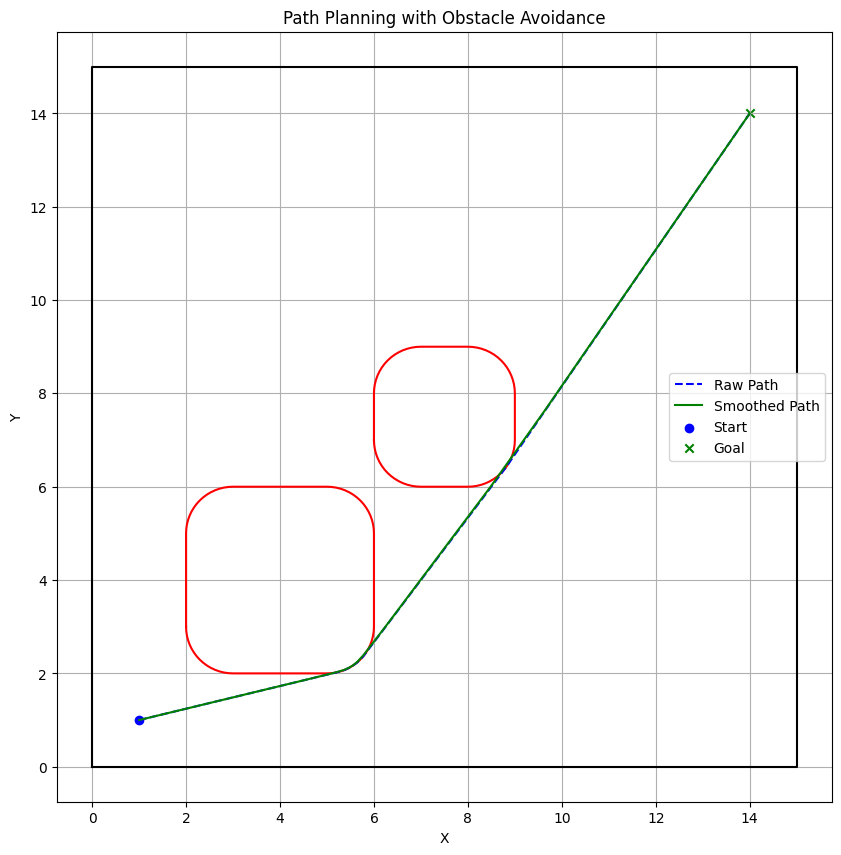

Point 0: Velocity = 0.00 units/s
Point 1: Velocity = 1.90 units/s
Point 2: Velocity = 2.00 units/s
Point 3: Velocity = 2.00 units/s
Point 4: Velocity = 2.00 units/s
Point 5: Velocity = 2.00 units/s
Point 6: Velocity = 2.00 units/s
Point 7: Velocity = 2.00 units/s
Point 8: Velocity = 2.00 units/s
Point 9: Velocity = 2.00 units/s
Point 10: Velocity = 2.00 units/s
Point 11: Velocity = 2.00 units/s


100%|██████████| 28/28 [00:03<00:00,  7.46it/s]


Raw path: [Point(1.00, 1.00), Point(2.02, 6.20), Point(2.04, 6.29), Point(2.08, 6.38), Point(2.12, 6.47), Point(2.17, 6.56), Point(2.23, 6.63), Point(7.23, 12.63), Point(7.29, 12.71), Point(7.37, 12.77), Point(7.44, 12.83), Point(13.44, 16.83), Point(13.53, 16.88), Point(13.62, 16.92), Point(13.71, 16.96), Point(13.80, 16.98), Point(18.00, 18.00)]


In [ ]:
import pyvisgraph as vg
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

def inflate_obstacle(obstacle, margin):
    """
    Inflate the given obstacle by the specified margin.
    """
    poly = Polygon([(p.x, p.y) for p in obstacle])
    inflated_poly = poly.buffer(margin)
    return [vg.Point(p[0], p[1]) for p in inflated_poly.exterior.coords[:-1]]

# Define track boundaries
track_bounds = [
    [vg.Point(0, 0), vg.Point(15, 0), vg.Point(15, 15), vg.Point(0, 15)]
]

# Define original obstacles
obstacles = [
    [vg.Point(3, 3), vg.Point(5, 3), vg.Point(5, 5), vg.Point(3, 5)],
    [vg.Point(7, 7), vg.Point(8, 7), vg.Point(8, 8), vg.Point(7, 8)]
]

# Inflate obstacles
safety_margin = 1.0  # Adjust the safety margin as needed
inflated_obstacles = [inflate_obstacle(obs, safety_margin) for obs in obstacles]

# Build visibility graph with inflated obstacles
g = vg.VisGraph()
g.build(track_bounds + inflated_obstacles)

# Define start and goal points
car_location = vg.Point(1, 1)
goal = vg.Point(14, 14)

# Compute the raw path
raw_path = g.shortest_path(car_location, goal)
if not raw_path:
    print("No valid path found.")
else:
    print("Raw path:", raw_path)

# Smooth the path
def smooth_path(path, weight_data=0.5, weight_smooth=0.1, tolerance=1e-6):
    new_path = np.copy(path)
    change = tolerance
    while change >= tolerance:
        change = 0.0
        for i in range(1, len(path) - 1):
            for j in range(len(path[0])):
                aux = new_path[i][j]
                new_path[i][j] += weight_data * (path[i][j] - new_path[i][j])
                new_path[i][j] += weight_smooth * (new_path[i - 1][j] + new_path[i + 1][j] - 2.0 * new_path[i][j])
                change += abs(aux - new_path[i][j])
    return new_path

path_array = np.array([[p.x, p.y] for p in raw_path])
smoothed_path = smooth_path(path_array)

# Compute velocity profile
def compute_velocity_profile(path, max_velocity, acceleration):
    velocities = [0]
    for i in range(1, len(path)):
        distance = np.linalg.norm(np.array(path[i]) - np.array(path[i - 1]))
        max_possible_velocity = np.sqrt(velocities[-1]**2 + 2 * acceleration * distance)
        velocities.append(min(max_velocity, max_possible_velocity))
    return velocities

max_velocity = 2.0  # units per second
acceleration = 0.5  # units per second^2
velocities = compute_velocity_profile(smoothed_path, max_velocity, acceleration)

# Plot the path
def plot_path(track_bounds, obstacles, raw_path, smoothed_path):
    plt.figure(figsize=(10, 10))
    for bound in track_bounds:
        bound.append(bound[0])  # to close the polygon
        plt.plot([p.x for p in bound], [p.y for p in bound], 'k-')
    for obs in obstacles:
        obs.append(obs[0])  # to close the polygon
        plt.plot([p.x for p in obs], [p.y for p in obs], 'r-')
    if raw_path:
        plt.plot([p.x for p in raw_path], [p.y for p in raw_path], 'b--', label='Raw Path')
    if smoothed_path.any():
        plt.plot(smoothed_path[:, 0], smoothed_path[:, 1], 'g-', label='Smoothed Path')
    plt.scatter([car_location.x], [car_location.y], c='blue', marker='o', label='Start')
    plt.scatter([goal.x], [goal.y], c='green', marker='x', label='Goal')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Path Planning with Obstacle Avoidance')
    plt.grid(True)
    plt.show()

plot_path(track_bounds, inflated_obstacles, raw_path, smoothed_path)

# Print velocity profile
for i, velocity in enumerate(velocities):
    print(f"Point {i}: Velocity = {velocity:.2f} units/s")
# Define a more complex track boundary
track_bounds = [
    [vg.Point(0, 0), vg.Point(20, 0), vg.Point(20, 20), vg.Point(0, 20)]
]

# Define additional obstacles
obstacles = [
    [vg.Point(3, 3), vg.Point(6, 3), vg.Point(6, 6), vg.Point(3, 6)],
    [vg.Point(8, 8), vg.Point(12, 8), vg.Point(12, 12), vg.Point(8, 12)],
    [vg.Point(14, 14), vg.Point(16, 14), vg.Point(16, 16), vg.Point(14, 16)],
    [vg.Point(5, 15), vg.Point(7, 15), vg.Point(7, 17), vg.Point(5, 17)]
]

# Inflate obstacles
safety_margin = 1.0  # Adjust the safety margin as needed
inflated_obstacles = [inflate_obstacle(obs, safety_margin) for obs in obstacles]

# Build visibility graph with inflated obstacles
g = vg.VisGraph()
g.build(track_bounds + inflated_obstacles)

# Define start and goal points
car_location = vg.Point(1, 1)
goal = vg.Point(18, 18)

# Compute the raw path
raw_path = g.shortest_path(car_location, goal)
if not raw_path:
    print("No valid path found.")
else:
    print("Raw path:", raw_path)

# Smooth the path
path_array = np.array([[p.x, p.y] for p in raw_path])
smoothed_path = smooth_path(path_array)

# Compute velocity profile
velocities = compute_velocity_profile(smoothed_path, max_velocity, 3)


